In [2]:
# Use the following data for this assignment:

%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995]).T
stats = df.describe()
#stats['ste'] = df.sem(axis=0)  # <- STE can be calculated in this way as well
stats.loc['ste'] = stats.loc['std'] / np.sqrt(stats.loc['count'])
stats.loc['lowCI95'] = stats.loc['mean'] - 1.96*stats.loc['ste']
stats.loc['upCI95']  = stats.loc['mean'] + 1.96*stats.loc['ste']
stats

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044
ste,3320.866311,1628.701180,2323.419534,1155.026400
lowCI95,26803.209506,38669.605227,34939.402654,45479.699225


<IPython.core.display.Javascript object>


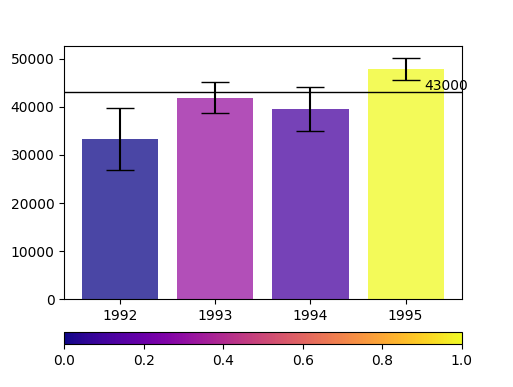

In [73]:
%matplotlib notebook

fig = plt.figure()
gspec = gridspec.GridSpec(20, 1)

ax1 = plt.subplot(gspec[0:17, 0:])
ax2 = plt.subplot(gspec[19, 0:])

years =stats.columns
pos = np.arange(len(years))
values = stats.loc['mean'].values   


def coeff(lowCI95, upCI95, threshold):
    c = 1 - (threshold - lowCI95) / (upCI95 - lowCI95)
    return c

threshold = 43000
my_cmap = plt.get_cmap("plasma") #seismic
bar = ax1.bar(pos, values, align='center',
            yerr=stats.loc['ste'].values * 1.96, capsize=10, alpha=0.75, 
            color = my_cmap(coeff(stats.loc['lowCI95'], stats.loc['upCI95'], threshold))) 
       # yerr - adds the confidence intervals
    
norm = mpl.colors.Normalize(vmin=0, vmax=1)
mpl.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=norm, orientation='horizontal')

plt.sca(ax1)
plt.xticks(pos, years)
axline = plt.axhline(y=threshold, linewidth=1, color='k')
annotation = plt.annotate(threshold, xy=(3.2, threshold + 500), xytext=(3.2, threshold + 500))


def update(threshold):
    axline.set_ydata(threshold)
    global annotation
    annotation.remove()
    annotation = plt.annotate(threshold, xy=(3.2, threshold + 500), xytext=(3.2, threshold + 500))
    for i in range(0,4):
        bar[i].set_color(my_cmap(coeff(stats.loc['lowCI95'], stats.loc['upCI95'], threshold))[i])
    
def onMouseMove(event):
    if event.inaxes == ax1:
        update(int(event.ydata))
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', onMouseMove)

